# Linear Regression 

## import library

In [84]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data for training and testing

In [85]:
fname_data  = 'assignment_07_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0]

xx          = np.zeros(num_data)
yy          = np.zeros(num_data)
zz          = np.zeros(num_data)

for i in range(num_data):

    xx[i] = data[i,0]
    yy[i] = data[i,1]
    zz[i] = data[i,2]
print(xx.shape,yy.shape,zz.shape)
print(data.shape)

(2500,) (2500,) (2500,)
(2500, 3)


## plot the data in the three dimensional space

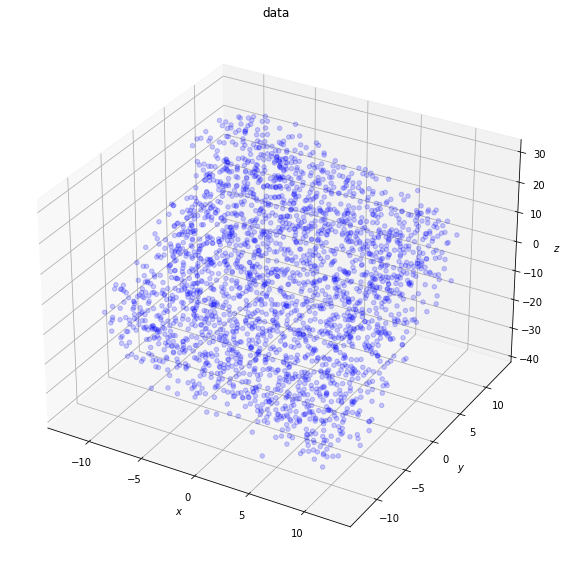

In [86]:
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='3d')
plt.title('data')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

plt.tight_layout()
plt.show()

## compute the loss function

In [87]:
def compute_residual(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    num_data = x.shape
    fun = theta[0]+theta[1]*x+theta[2]*y
    residual = z - fun
    
    # ============================
    return residual, num_data

In [88]:
def compute_loss(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    residual,num_data = compute_residual(theta, x, y, z)
    loss = (residual.T@residual)/num_data
    # ============================
    return loss

## compute the gradient for each model parameter (DO NOT COMPUTE THE GRADIENT FOR EACH MODEL PARAMETER, BUT DO COMPUTE THE GRADIENT OF THE MODEL PARAMTER VECTOR)

In [89]:
def compute_gradient(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    residual, num_data = compute_residual(theta, x, y, z)
    grad = (x.T@residual)/num_data
    
    

    # ============================
    return grad

## gradient descent for each model parameter

In [90]:
num_iteration   = 1000
learning_rate   = 0.01

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration) 

for i in range(num_iteration):
    # ===== FILL UP THE CODE =====
    loss_iteration[i] = compute_gradient(theta_iteration[i], xx, yy, zz)
    if(i+1<1000):
        theta_iteration[i+1] = theta_iteration[i]-learning_rate*loss_iteration[i]
    loss = compute_loss(theta_iteration[i], xx,yy,zz)
    # ============================
    print("iteration = %4d, loss = %5.5f" % (i, loss))

iteration =    0, loss = 190.73537
iteration =    1, loss = 177.27967
iteration =    2, loss = 186.50694
iteration =    3, loss = 250.10450
iteration =    4, loss = 431.24518
iteration =    5, loss = 853.05325
iteration =    6, loss = 1751.93224
iteration =    7, loss = 3577.17103
iteration =    8, loss = 7176.58719
iteration =    9, loss = 14141.98337
iteration =   10, loss = 27451.26013
iteration =   11, loss = 52660.94181
iteration =   12, loss = 100119.57600
iteration =   13, loss = 189074.10449
iteration =   14, loss = 355285.64822
iteration =   15, loss = 665150.56187
iteration =   16, loss = 1241878.84358
iteration =   17, loss = 2314018.89295
iteration =   18, loss = 4305395.33459
iteration =   19, loss = 8001791.96816
iteration =   20, loss = 14859851.69911
iteration =   21, loss = 27579514.15088
iteration =   22, loss = 51164798.66811
iteration =   23, loss = 94889499.43619
iteration =   24, loss = 175939683.41328
iteration =   25, loss = 326163285.55242
iteration =   26, los

iteration =  825, loss = 6400912165301765770088530730556116137079309749672077436710603222276682982110382562450304365412869190727650398883863099247081103213122304786260327731636583766912190120889759819121197079740352470273690764187053565180607725568.00000
iteration =  826, loss = 11860613761631133921384992065968920049934870162859885019491045373941271684960673224281150324831060958485413485264049994015347515153368105080335971641650944689502512870646974733900837443599180287313209368313058030963002441728.00000
iteration =  827, loss = 21977204993557654420896765333011824245415680175091969910390083212838717466455037631436287219434127335650686464845710417924154698458794452862981154009410352624175975604008506878134651602883501333847043294156398047825596776448.00000
iteration =  828, loss = 4072281157079269762504026535203871701773437160698038579914897219741603804917531121569577414445437057283238370061846346041465122195208490291527159855656954885952908620983466559255163827452328565373952473425789

In [91]:
f = theta[0] + theta[1] * xx + theta[2] * yy

## plot the results

In [ ]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    # ===== FILL UP THE CODE =====


    # ============================
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_data(xx, yy, zz):
    
    fig = plt.figure(figsize=(12, 8))
    ax  = plt.subplot(111, projection='3d')
    plt.title('data')
    # ===== FILL UP THE CODE =====


    # ============================    
    plt.tight_layout()
    plt.show()

In [ ]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    # ===== FILL UP THE CODE =====


    # ============================
    plt.tight_layout()
    plt.show()

In [ ]:
plot_loss_curve(loss_iteration)

In [ ]:
plot_model_parameter(theta_iteration)

In [ ]:
    # ===== FILL UP THE CODE =====


    # ============================

def plot_surface(XX, YY, ZZ, xx, yy, zz):

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('regression surface')

    ax  = plt.axes(projection='3d')
    # ===== FILL UP THE CODE =====


    # ============================
    plt.tight_layout()
    plt.show()

In [ ]:
plot_surface(XX, YY, ZZ, xx, yy, zz)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point in 3-dimensional space

In [ ]:
plot_data(xx, yy, zz)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

In [ ]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

In [ ]:
plot_loss_curve(loss_iteration)

### # 04. plot the optimal regression surface $\hat{f}(\theta^*)$ in 3-dimensional space with a given set of data points superimposed

In [ ]:
plot_surface(XX, YY, ZZ, xx, yy, zz)